### IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

### LOADING THE DATASET

In [6]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### ABOUT THE DATASET

In [7]:
df.shape

(1000, 8)

In [8]:
df.size

8000

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

- there are 1000 rows and 8 columns
- there are 8000 elements
- there are three numerical columns(math score,reading score,writing score)

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

    each feature tells about:
        'gender'                        - gender of the student whether Female or Male
        'race/ethnicity'                - groups of students(A,B,C,D,E)
        'parental level of education'   - educaton level student's parents
        'lunch'                         - type of their lunch(standard ,free)   
        'test preparation course'       - test preparation course(completed,none)
        'math score'                    - marks obtained in maths
        'reading score'                 - marks obtained in reading
        'writing score'                 - marks obtained in writing



### COLUMNS-UNIQUE VALUES


In [12]:
print("number of unique values: \n",df.nunique())

number of unique values: 
 gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


In [14]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [15]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [16]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [17]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [18]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

### MISSING VALUES

In [19]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- there is no null values

### DESCRIBE

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


    - count is 1000,that is there presents only non-null values
    - mean:
        maths - 66
        reading - 69
        writing  -68
    - max:
        maths - 100
        reading - 100
        writing  - 100


### EDA

###### PAIRPLOT

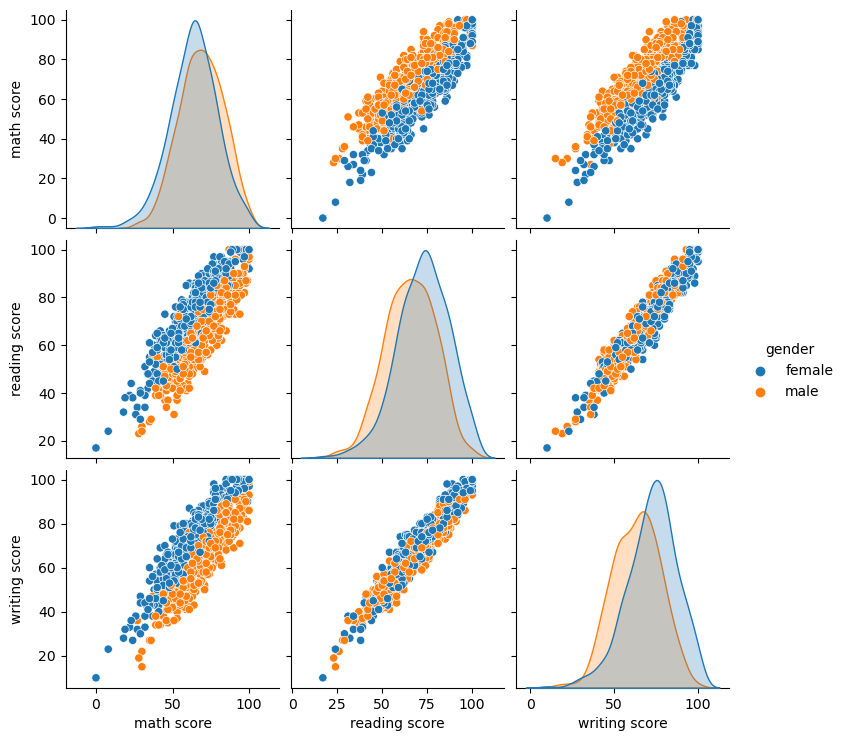

In [20]:
sns.pairplot(df, hue = 'gender')
plt.show()

###### HEATMAP

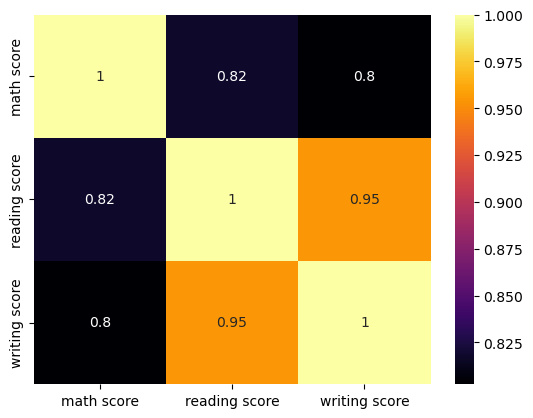

In [23]:
sns.heatmap(df.corr(), annot = True, cmap='inferno')
plt.show()

- There is strong correlation between a student's reading score & writing score, reading score & math score and writing score & math score

###### DISTRIBUTION OF MARKS

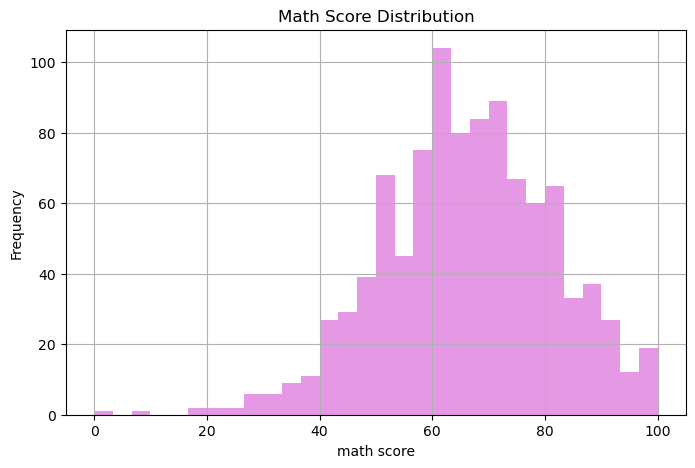

In [27]:
plt.figure(figsize=(8,5))
sns.distplot(df['math score'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('Math Score Distribution')
plt.grid()
plt.show()

- Most students have their math score in the range of 60 to 80

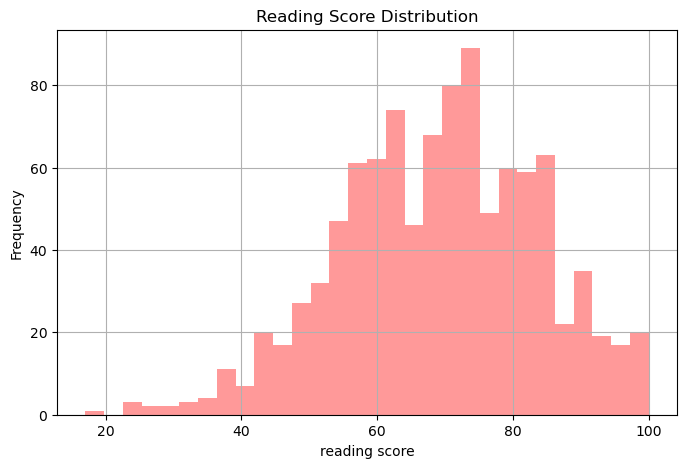

In [28]:
plt.figure(figsize=(8,5))
sns.distplot(df['reading score'], kde = False, color='r', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.grid()
plt.show()

- Most students have their reading score in the range of 60 to 80

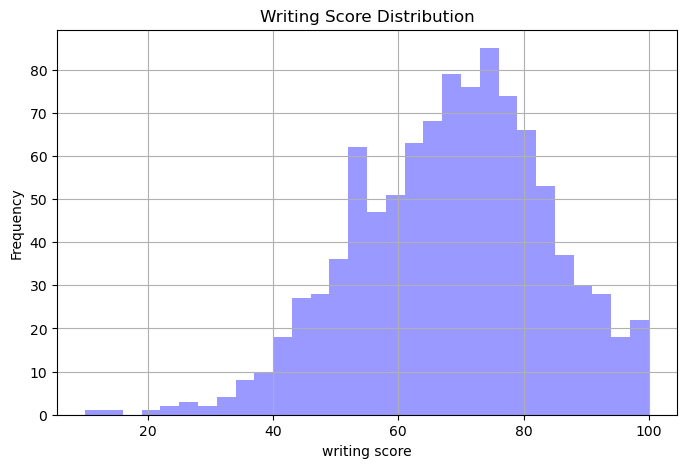

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(df['writing score'], kde = False, color='blue', bins = 30)
plt.ylabel('Frequency')
plt.title('Writing Score Distribution')
plt.grid()
plt.show()

- Most students have their writing score in the range of 60 to 80

###### ANALYSING MAXIMUM AND MINIMUM SCORE OF STUDENTS

In [30]:
print("MATHS SCORE")
print('Maximum score in Maths is: ',max(df['math score']))
print('Minimum score in Maths is: ',min(df['math score']))
print("=====================")
print("READING SCORE")
print('Maximum score in Reading is: ',max(df['reading score']))
print('Minimum score in Reading is: ',min(df['reading score']))
print("=====================")
print("WRITING SCORE")
print('Maximum score in Writing is: ',max(df['writing score']))
print('Mimimum score in Writing is: ',min(df['writing score']))
print("=====================")

MATHS SCORE
Maximum score in Maths is:  100
Minimum score in Maths is:  0
READING SCORE
Maximum score in Reading is:  100
Minimum score in Reading is:  17
WRITING SCORE
Maximum score in Writing is:  100
Mimimum score in Writing is:  10


###### NUMBER OF STUDENTS SCORING MAXIMUM

In [33]:
print('No. of students having maximum score in math: ', len(df[df['math score'] == 100]))
print('No. of students having maximum score in reading: ', len(df[df['reading score'] == 100]))
print('No. of students having maximum score in writing: ', len(df[df['writing score'] == 100]))

No. of students having maximum score in math:  7
No. of students having maximum score in reading:  17
No. of students having maximum score in writing:  14


###### Number of Students having maximum marks in all three categories

In [34]:
max_scr_3 = df[(df['math score'] == 100) & (df['writing score'] == 100) & (df['reading score'] == 100)]
max_scr_3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


- Number of students having maximum marks in all three subjects:  3

###### Number of Students having minimum marks in all three categories

In [35]:
min_scr_3 = df[(df['math score'] == 0) & (df['writing score'] == 10) & (df['reading score'] == 17)]
min_scr_3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


- Number of students having minimum marks in all three subjects: 1

### DATA VISUALIZATION

###### which gender scores more?

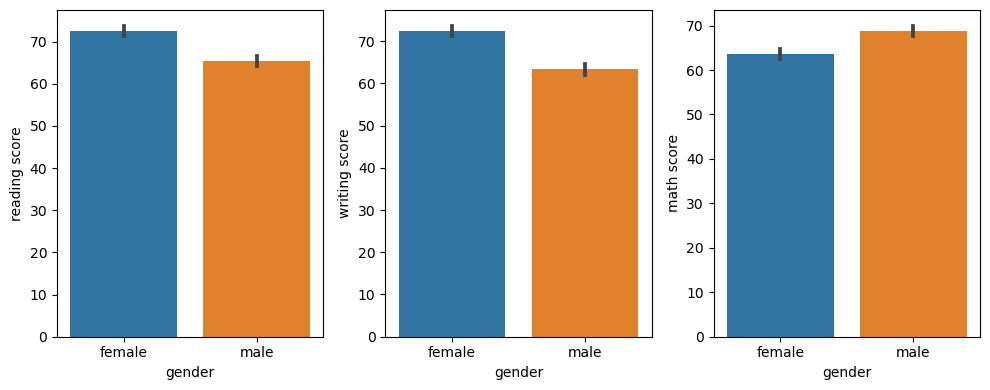

In [36]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'math score', data = df)

plt.tight_layout()

- Males have higher math score than Females, whereas Females have higher scores in reading and writing than Males

###### which group/race scores more?

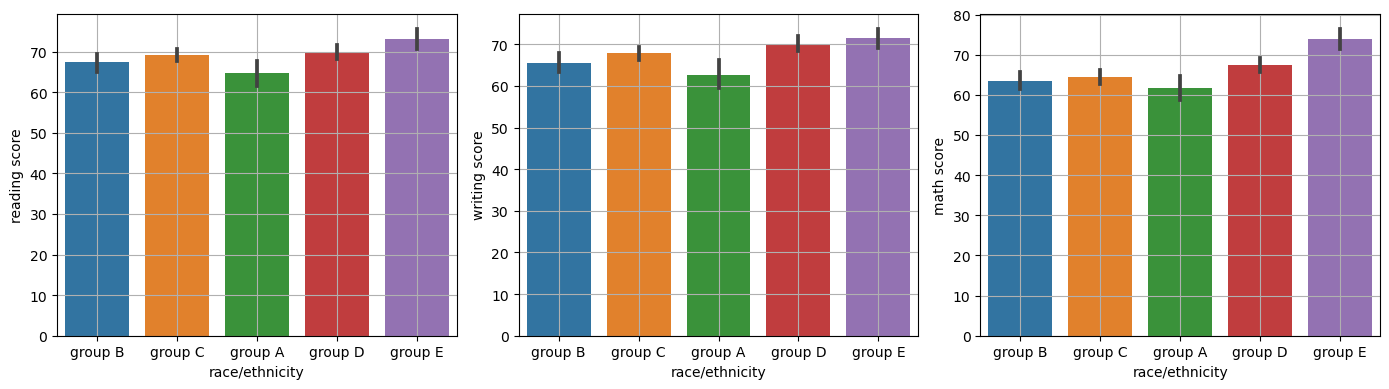

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'race/ethnicity', y = 'reading score', data = df)
plt.grid()

plt.subplot(1,3,2)
sns.barplot(x = 'race/ethnicity', y = 'writing score', data = df)
plt.grid()

plt.subplot(1,3,3)
sns.barplot(x = 'race/ethnicity', y = 'math score', data = df)
plt.grid()

plt.tight_layout()


- People from group E have higher score in all three categories, where as people from group A have the lowest score in all three categories

###### what about test preparation

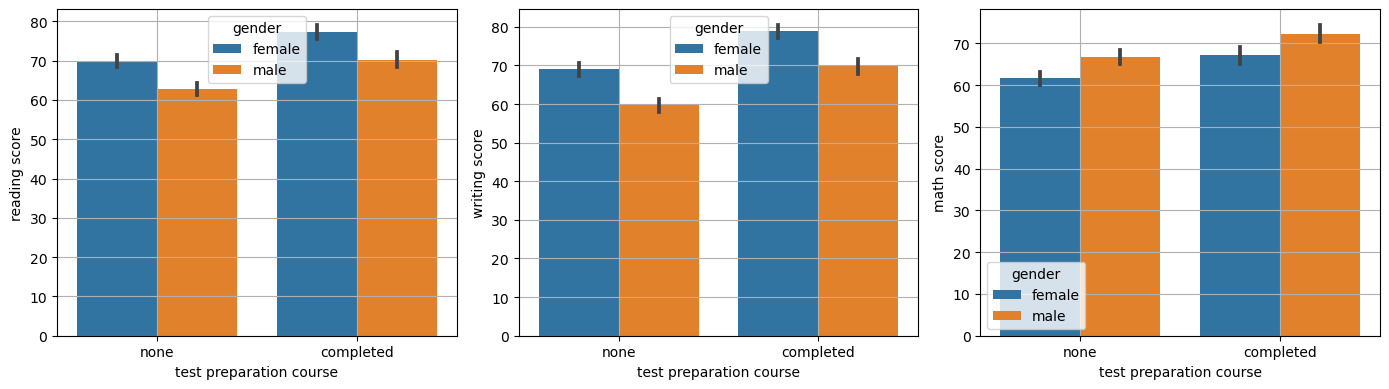

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = df)
plt.grid()

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = df)
plt.grid()

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'math score',hue = 'gender', data = df)
plt.grid()

plt.tight_layout()

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

###### what about Scores on the basis of Parent's Education Level?

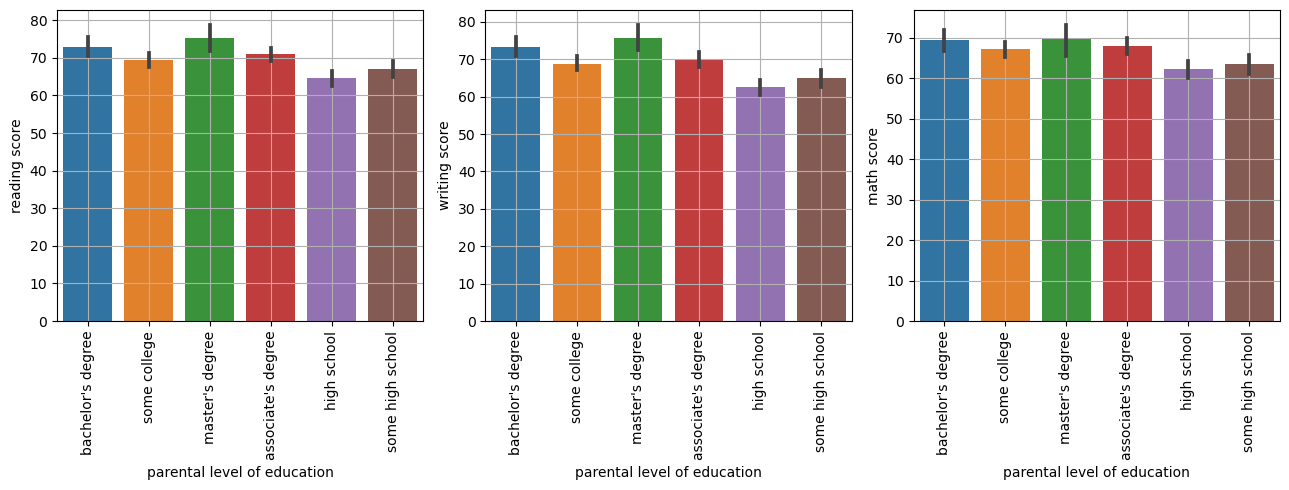

In [42]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.barplot(x = 'parental level of education', y = 'reading score', data = df)
plt.xticks(rotation = 90)
plt.grid()

plt.subplot(1,3,2)
sns.barplot(x = 'parental level of education', y = 'writing score', data = df)
plt.xticks(rotation = 90)
plt.grid()

plt.subplot(1,3,3)
sns.barplot(x = 'parental level of education', y = 'math score', data = df)
plt.xticks(rotation = 90)
plt.grid()

plt.tight_layout()

- Student's whose parents have a Master's degree have scored higher compared to others whereas Student's whose parent's went to high school have obtained low marks compared to others

###### what about Scores on the basis of Types of Lunch

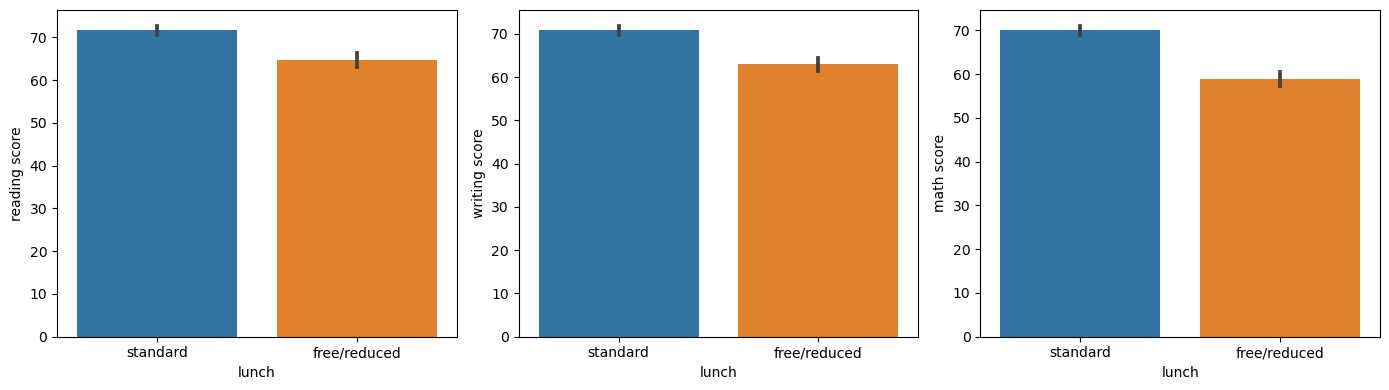

In [43]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'lunch', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'lunch', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'lunch', y = 'math score', data = df)


plt.tight_layout()

- Students who availed standard luch have scored higher in all the three categories compared to students who have taken free/ reduced lunch

### OUTLIERS

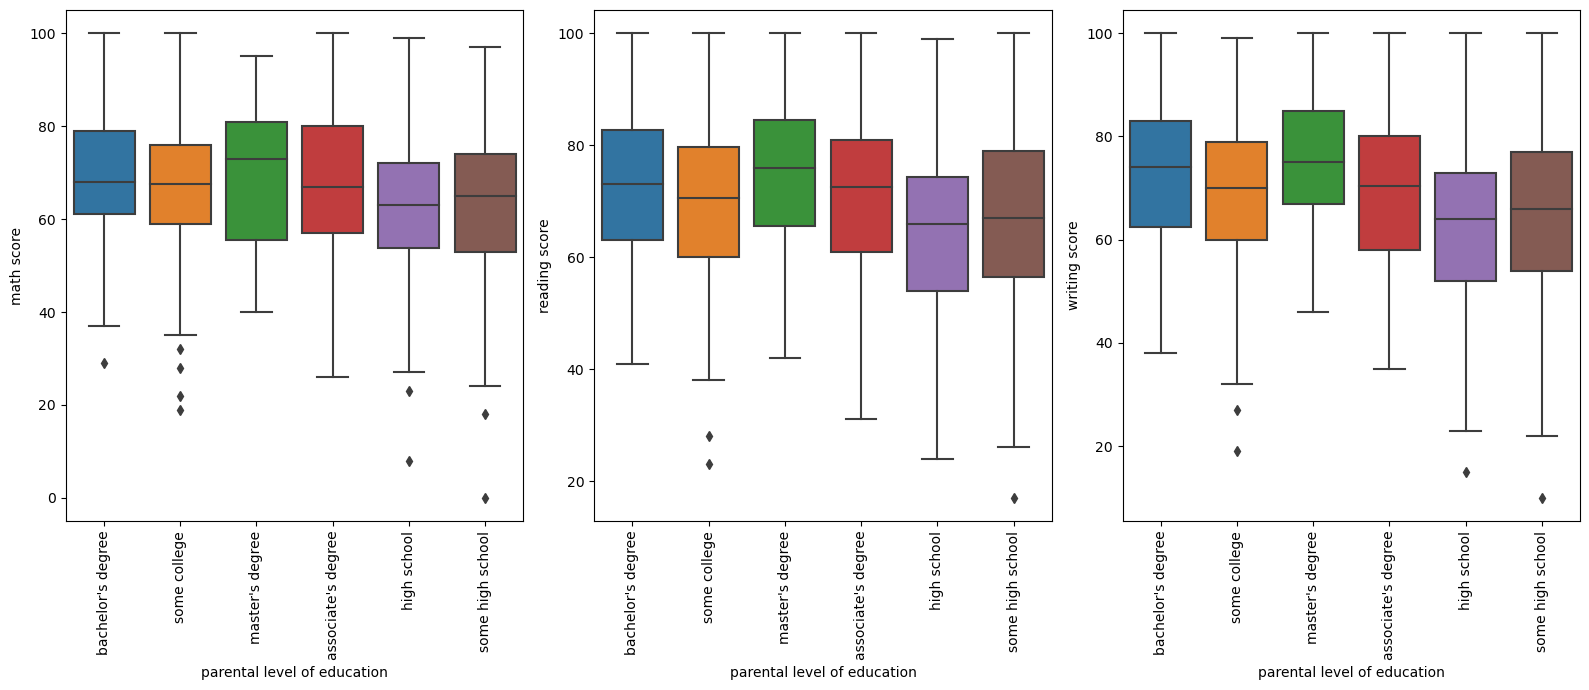

In [44]:
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
sns.boxplot(x ='parental level of education' , y = 'math score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.boxplot(x ='parental level of education' , y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.boxplot(x ='parental level of education' , y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

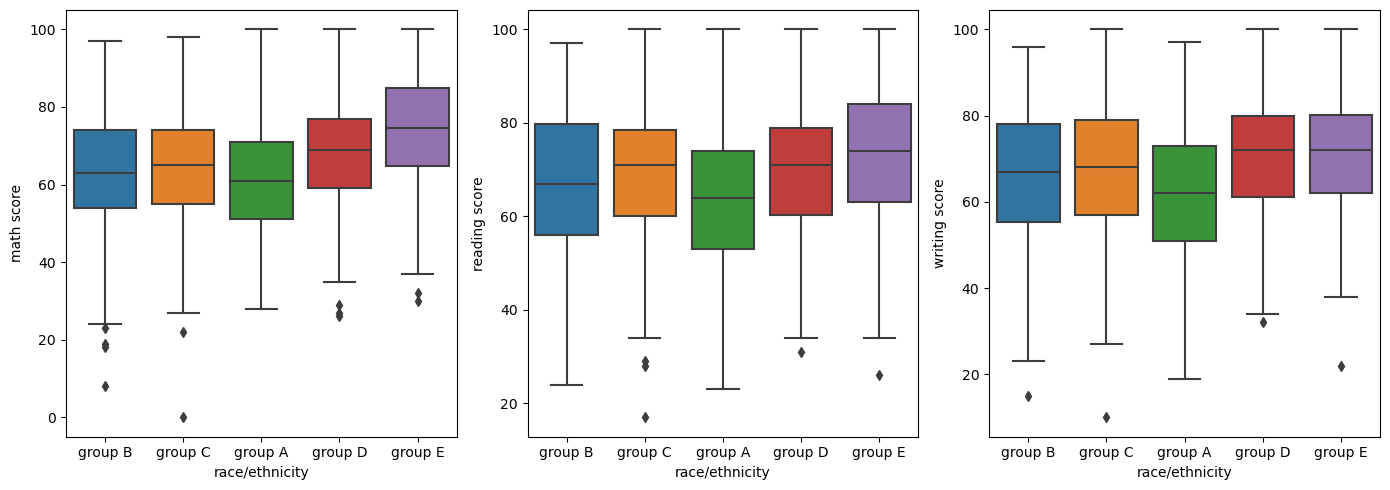

In [46]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'race/ethnicity', y = 'math score', data = df)

plt.subplot(1,3,2)
sns.boxplot(x = 'race/ethnicity', y = 'reading score', data = df)

plt.subplot(1,3,3)
sns.boxplot(x = 'race/ethnicity', y = 'writing score', data = df)

plt.tight_layout()


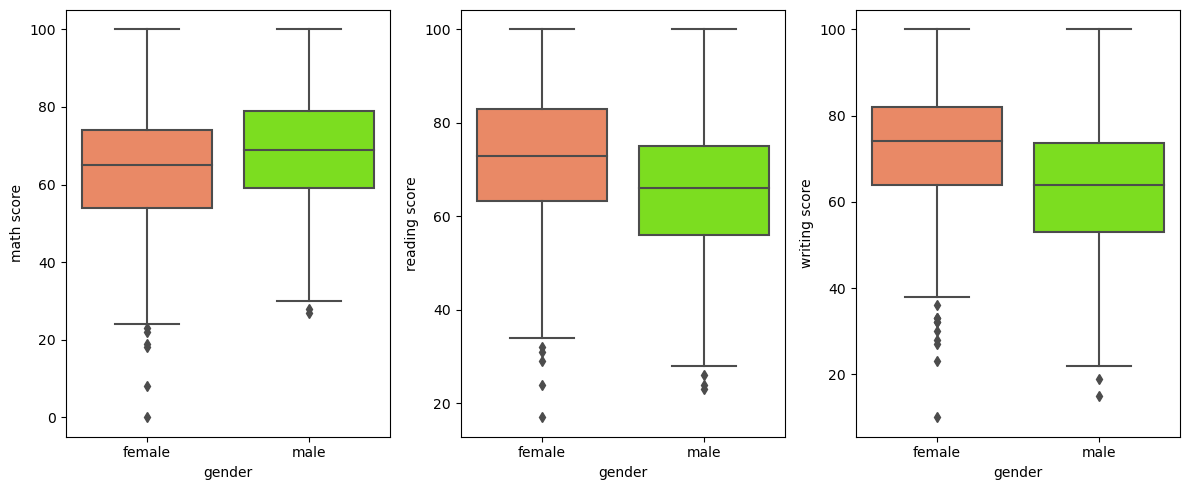

In [47]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math score', data = df,palette = ['coral', 'lawngreen'])

plt.subplot(1,3,2)
sns.boxplot(x = 'gender', y = 'reading score', data = df,palette = ['coral', 'lawngreen'])

plt.subplot(1,3,3)
sns.boxplot(x = 'gender', y = 'writing score', data = df,palette = ['coral', 'lawngreen'])

plt.tight_layout()

### Grading system for marks obtained

1. O (Outstanding): Student who scores 91 marks or higher in a subject
2. A+ (Excellent): Student who scores 82 marks or higher in a subject
3. A (Very Good): Student who scores 73 marks or higher in a subject
4. B+ (Good): Student who scores 64 marks or higher in a subject
5. B (Above Average): Student who scores 55 marks or higher in a subject
6. C (Average): Student who scores 46 marks or higher in a subject
7. P (Pass): Student who scores 35 marks or higher in a subject
8. F (Fail): Student who scores less than 35 marks in a subject

In [48]:
def get_grade(marks):
    if marks >= 91:
        return 'O'
    elif marks >= 82 and marks < 91:
        return 'A+'
    elif marks >=73 and marks < 82:
        return 'A'
    elif marks >=64 and marks < 73:
        return 'B+'
    elif marks >= 55 and marks < 64:
        return 'B'
    elif marks >=46 and marks < 55:
        return 'C'
    elif marks >= 35 and marks < 46:
        return 'P'
    elif marks < 35:
        return 'F'

In [49]:
df['reading_grade'] = df['reading score'].apply(get_grade)
df['writing_grade'] = df['writing score'].apply(get_grade)
df['math_grade'] = df['math score'].apply(get_grade)

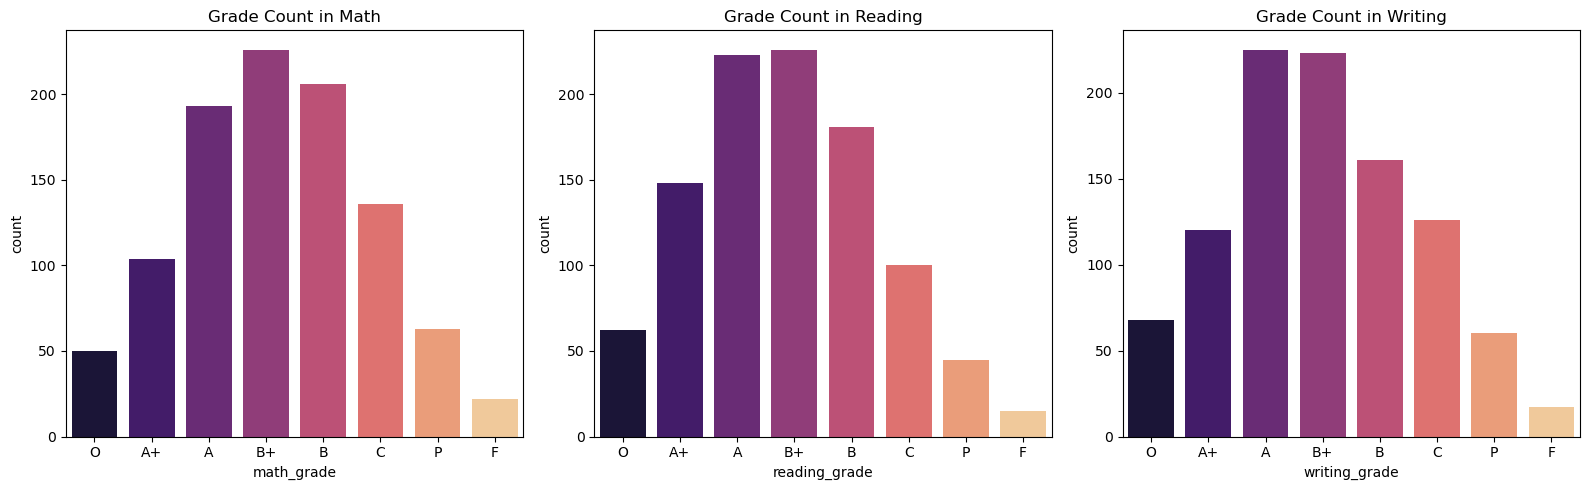

In [50]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(x ='math_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Math')


plt.subplot(1,3,2)
sns.countplot(x ='reading_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Reading')

plt.subplot(1,3,3)
sns.countplot(x ='writing_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Writing')

plt.tight_layout()

- Most of the students have got a B+ in Maths and Reading Section whereas in Writing Section almost equal number of students have got A and B+ grade.
- The number of candidates who just got a qualifying grade(P) and passed is the highest in maths.

###### Number of students having maximum grade in all three categories

In [55]:
len(df[(df['writing_grade'] == 'O') & (df['math_grade'] == 'O') & (df['reading_grade'] == 'O')])

23

###### Number of students having minimum grade/failed in all three categories

In [56]:
len(df[(df['writing_grade'] == 'F') & (df['math_grade'] == 'F') & (df['reading_grade'] == 'F')])

8

- Number of students having maximum grade(O) in all three subjects:  23
- Number of students having minimun grade(F)/failed in all three subjects:  8

###### Classifying Students as Passed or Failed

In [76]:
#Failed Students
failed_students = df[(df['writing_grade'] == 'F') & (df['math_grade'] == 'F') & (df['reading_grade'] == 'F')]
#Passed Students
passed_students = len(df) - len(failed_students)

In [60]:
print('Total Number of students who failed are: {}' .format(len(failed_students)))
print('Total Number of students who passed are: {}' .format(passed_students))

Total Number of students who failed are: 8
Total Number of students who passed are: 992


###### CONCLUSIONS:
    - There is strong correlation between a student's reading score & writing score, reading score & math score and writing score & math score
    - Number of students having maximum marks in all three subjects: 3
    - Number of students having minimum marks in all three subjects: 1
    - Males have higher math score than Females, whereas Females have higher scores in reading and writing than Males
    - People from group E have higher score in all three categories, where as people from group A have the lowest score in all three categories
    - Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course
    - Student's whose parents have a Master's degree have scored higher compared to others whereas Student's whose parent's went to high school have obtained low marks compared to others
    - Students who availed standard luch have scored higher in all the three categories compared to students who have taken free/ reduced lunch
    - Most of the students have got a B+ in Maths and Reading Section whereas in Writing Section almost equal number of students have got A and B+ grade.
    - The number of candidates who just got a qualifying grade(P) and passed is the highest in maths.
    - Number of students having maximum grade(O) in all three subjects:  23
    - Number of students having minimun grade(F)/failed in all three subjects:  8
    - Total Number of students who failed are: 8
    - Total Number of students who passed are: 992
    
    
    